# Neural network for energy gap prediction Eg(x, y)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### FORMULE DU GAP Eg(x,y)

In [68]:
def calculer_Eg(x, y):
    
    """ calculer_Eg(x,y) = 1.35 + 0.668x - 1.068y + 0.758x² + 0.078y² - 0.069xy - 0.322x²y + 0.03xy² """
    return (1.35 + 0.668*x - 1.068*y + 0.758*x**2 + 0.078*y**2
            - 0.069*x*y - 0.322*x**2*y + 0.03*x*y**2)

### DONNÉES D'ENTRAÎNEMENT (2 points de l'exercice)

In [60]:
X_data = np.array([
    [0.2, 0.3],   
    [0.2, 0.0]   
])

# Calcul des valeurs réelles de Eg
Y_data = np.array([calculer_Eg(x, y) for x, y in X_data])

print("Points d'entraînement:")
for i, (x, y) in enumerate(X_data):
    print(f" - Point {i+1}: x={x}, y={y} → Eg={Y_data[i]:.6f} eV")

Points d'entraînement:
 - Point 1: x=0.2, y=0.3 → Eg=1.193076 eV
 - Point 2: x=0.2, y=0.0 → Eg=1.513920 eV


### ARCHITECTURE DU RÉSEAU DE NEURONES ET ENTRAINEMENT DU RESEAU DE NEURONES

In [72]:
# Archi
model = MLPRegressor(
    hidden_layer_sizes=(32, 32),  # deux couches cachées de 16 neurones
    activation='relu',            # fonction d'activation ReLU
    solver='adam',                # méthode d'optimisation
    learning_rate_init=0.001,
    max_iter=5000,                # nombre maximum d’itérations
    random_state=42                # graine pour la reproductibilité
)

# Entraînement du modèle
model.fit(X_data, Y_data)

print("\n Entraînement du modèle...")
print(f" - Entraîné en {model.n_iter_} itérations")
print(f" - Loss finale: {model.loss_:.8f}")


 Entraînement du modèle...
 - Entraîné en 60 itérations
 - Loss finale: 0.01154016


### Prédiction du Eg(x, y)

In [80]:
Y_pred = model.predict(X_data)

print("\nRésultats de prédiction :")
for i, (x, y) in enumerate(X_data):
    print(f"\n Point {i+1}: x={x}, y={y}")
    print(f"   - Eg réel:  {Y_data[i]:.6f} eV")
    print(f"   - Eg prédit: {Y_pred[i]:.6f} eV")
    print(f"   - Erreur:   {abs(Y_data[i] - Y_pred[i]):.6f} eV")



Résultats de prédiction :

 Point 1: x=0.2, y=0.3
   - Eg réel:  1.193076 eV
   - Eg prédit: 1.382408 eV
   - Erreur:   0.189332 eV

 Point 2: x=0.2, y=0.0
   - Eg réel:  1.513920 eV
   - Eg prédit: 1.429095 eV
   - Erreur:   0.084825 eV


### MÉTRIQUES DE PERFORMANCE

In [99]:
mse = mean_squared_error(Y_data, Y_pred)
mae = mean_absolute_error(Y_data, Y_pred)
r2 = r2_score(Y_data, Y_pred)

print("\n Métriques de performance :")
print(f"\n - MSE (Mean Squared Error):  {mse:.8f}")
print(f" - MAE (Mean Absolute Error): {mae:.8f} eV")
print(f" - R² Score: {r2:.6f}")

if mae < 0.001:
    print("\n Le réseau a parfaitement appris les 2 points!")
elif mae < 0.01:
    print("\n Erreur acceptable")
else:
    print("\n Erreur élevée - Il faut augmenter max_iter")


 Métriques de performance :

 - MSE (Mean Squared Error):  0.02152095
 - MAE (Mean Absolute Error): 0.13707851 eV
 - R² Score: 0.163755

 Erreur élevée - Il faut augmenter max_iter


### Visualisation graphique

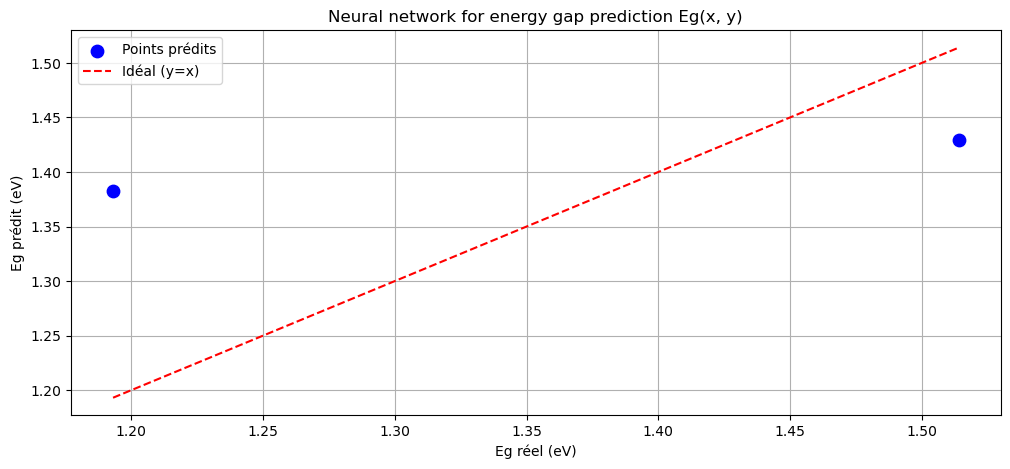

In [97]:
plt.figure(figsize=(12, 5))
plt.scatter(Y_data, Y_pred, color='blue', s=80, label='Points prédits')
plt.plot([min(Y_data), max(Y_data)], [min(Y_data), max(Y_data)], 'r--', label='Idéal (y=x)')
plt.xlabel("Eg réel (eV)")
plt.ylabel("Eg prédit (eV)")
plt.title("Neural network for energy gap prediction Eg(x, y)")
plt.legend()
plt.grid(True)
plt.show()
